# Homework 8

## Instructions
+ Please write you solutions in cells below each problem. Use multiple cells if necessary. 
+ The solutions may be in the form of code, markdown, or a combination of both. Make an effort to present the solutions in a clean fashion.
+ Please submit this notebook in your git repository, under the folder `problemset`. The notebook should be titled `lastname_firstname_hw8.ipynb` (all lower case).


For all the plots below: please label each axes, add a legend (where appropriate), and title the plot. All the fontsizes should be at least $14$.


### Problem 1: Project (2 points)

Let me know in a cell below which project option you plan to choose. If you're proposing your own project, please give the appropriate details. 

For the final project I will implement a clustering algorithm. My research is currently focusing on natural language processing so I hope to find some free-text data sets and perform some cluster analysis.


### Problem 2: 1D plotting (3 points)

Problem 1: The file [src/plot/xy.dat](https://github.com/hplgit/scipro-primer/blob/master/src/plot/xy.dat) contains two columns of numbers, corresponding to x and y coordinates on a curve.


Save the file in a local folder as `xy.dat`. You can read the data as 
```
import numpy as np
# Read table of floats
data = np.loadtxt(’xy.dat’, dtype=np.float) # Extract one-dim arrays from two-dim data 
x = data[:,0] # column with index 0
y = data[:,1] # column with index 1
```


1. Plot the data points as a black curve (with linewidth 3). 
2. Plot the global minimizer and maximizer as red points on the curve. Compute these points by searching through the y-coordinates (you do not need an optimization routine). 
3. Add a legend entry for the curve, the minimizer, and the maximizer.

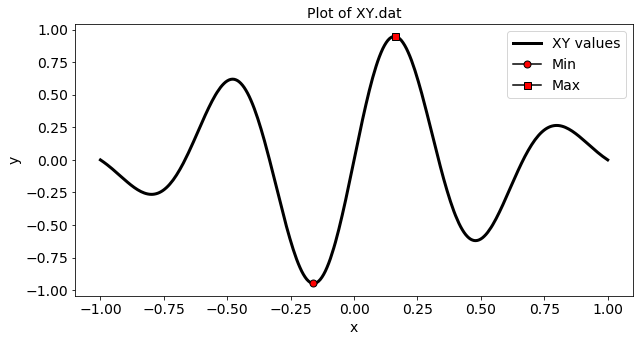

In [41]:
import numpy as np
import matplotlib.pyplot as plt

#beautify plots
plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

# Read table of floats
data = np.loadtxt("xy.dat", dtype=np.float) # Extract one-dim arrays from two-dim data 
x = data[:,0] # column with index 0
y = data[:,1] # column with index 1

#find max and min
maxY = -10**6; minY = 10**6 #set these values arbitrarly large
maxX = 0; minX = 0 #set these values arbitrarly
for i in range(len(y)):
    if y[i] < minY:
        minY = y[i]; minX =x[i] 
    if y[i] > maxY:
        maxY = y[i]; maxX = x[i]

plt.figure() #start new figure
plt.plot(x, y, color = "black", lw = 3)
plt.xlabel("x", fontsize = "14"); plt.ylabel("y", fontsize = "14"); plt.title("Plot of XY.dat", fontsize = "14")
plt.plot(minX, minY, color = "black", markerfacecolor = "red", marker = "o", markersize = "7") #plot min
plt.plot(maxX, maxY, color = "black", markerfacecolor = "red", marker = "s", markersize = "7") #plot max
plt.legend(('XY values', 'Min', 'Max'), loc = 'upper right', fontsize = "14")
plt.show()

### Problem 3: 2D Plotting (5 points) 
Consider the Rosenbrock function 
$$ f(x_1,x_2) = (x_1-1)^2  + 100(x_2-x_1^2)^2.$$

1. Plot the function as three different subplots using `pcolormesh`, `contour` or `contourf`, `surf` (you need to use `mplot3d`).
2. Find the global minimum using `scipy.optimize.minimize`.
3. Plot the optimization path (i.e., the sequence of iterates) on a contour plot. Note that to get the optimization history use the `callback` option. Here is an example of a callback function; the list `hist` has the iteration history. 


```
hist = []
def callback(xk):
    hist.append(xk)
    return 
```

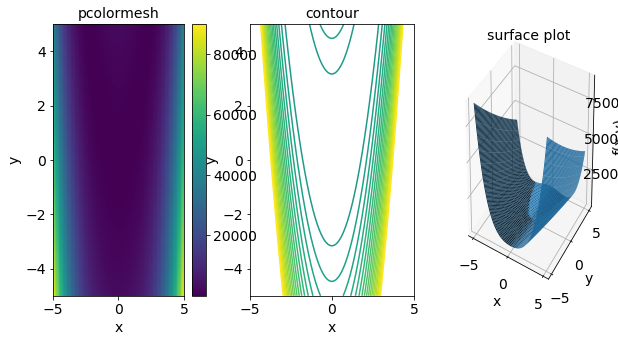

In [233]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

#1
#beautify plots
plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

#dx, dy = 0.05, 0.05 #control resolution

#generate grids for x & y bounds -1, 3
#y, x = np.mgrid[slice(-5, 5 + dy, dy), slice(-5, 5 + dx, dx)]
#y, x = np.meshgrid(np.arange(-5,5,dy),np.arange(-5,5,dx))

f = lambda x,y : (x-1)**2 + 100*((y-x**2)**2)

start = -5
stop = 5
n_values = 10**2
x_vals = np.linspace(start, stop, n_values)
y_vals = np.linspace(start, stop, n_values)
x,y = np.meshgrid(x_vals, y_vals)

#z = (x-1)**2 + 100*(y-x**2)**2
z = f(x,y)
#z = z[:-1, :-1]

#plot figure
fig = plt.figure()
#fig, (ax0, ax1, ax2) = plt.subplots(1,3)

ax0 = fig.add_subplot(1, 3, 1)
ax1 = fig.add_subplot(1, 3, 2)
ax2 = fig.add_subplot(1, 3, 3, projection = '3d')


im = ax0.pcolormesh(x, y, z)
fig.colorbar(im, ax=ax0)
ax0.set_title('pcolormesh', size = "14")
ax0.set_xlabel('x', size = '14')
ax0.set_ylabel('y', size = '14')

cf = ax1.contour(x, y, z, levels = np.arange(-20000, 20000,1000))
ax1.set_title('contour', size = '14')
ax1.set_xlabel('x', size = '14')
ax1.set_ylabel('y', size = '14')

x1 = x[:-1, :-1]; y1 = y[:-1, :-1]
sf = ax2.plot_surface(x, y, z)
ax2.set_title('surface plot', size = '14')
ax2.set_xlabel('x', size = '14')
ax2.set_ylabel('y', size = '14')
ax2.set_zlabel('f(x,y)', size = '14')

plt.show(fig)

      fun: 2.112634678287409e-11
 hess_inv: array([[0.49378146, 0.98756105],
       [0.98756105, 1.98011829]])
      jac: array([-2.90564340e-07,  2.72884382e-08])
  message: 'Optimization terminated successfully.'
     nfev: 148
      nit: 32
     njev: 37
   status: 0
  success: True
        x: array([0.9999954, 0.9999908])


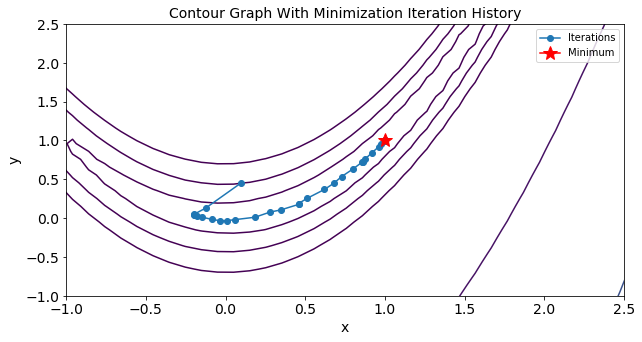

In [232]:
#2,3
from scipy.optimize import minimize

#define function
def func(x):
    return (x[0]-1)**2 + 100*(x[1]-x[0]**2)**2


hist = []
def callbackF(xk):
    hist.append(xk)

x0 = np.array([1,0])

minRes = minimize(func, x0, callback = callbackF)



#fig = plt.figure()
#ax = fig.add_subplot(1,1,1)

histX = []; histY = []
for i in range(len(hist)):
    histX.append(hist[i][0])
    histY.append(hist[i][1])

#levels = np.arange(0,100,20)
levels = [0.0, 5, 20, 50, 1000, 5000, 10000, 20000]
plt.contour(x, y, z, levels)
plt.plot(histX, histY, marker = 'o')

plt.plot(1, 1, marker = '*', markersize = 15, color = 'red')

plt.xlim([-1,2.5]); plt.ylim([-1,2.5])
plt.xlabel('x', fontsize = '14')
plt.ylabel('y', fontsize = '14')
plt.title('Contour Graph With Minimization Iteration History', size = '14')
plt.legend(('Iterations', 'Minimum'))
print(minRes)
#print(histX)